# K Medias 

Definimos $C_1, C_2, \cdots , C_k$ como los conjuntos que contienen los indices de las observaciones que pertenecen a cada cluster $C_i$ estos conjuntos satisfacen las propiedades 

1. $C_1 \cup C_2, \cdots , C_k = \{ 1,2, \cdots , n \}$. Cada observación pertenece por lo menos a uno de los grupos (clusters).

2. $C_k \cap C_k' = 0$ para toda $k \not= $. Ninguna observación pertenece a más de un grupo.

La variación intra grupo para cada grupo $C_k$ es una medida $W(C_k)$ de cuanto difieren las observaciones dentro del grupo $C_k$. Para formar los grupo necesitamos resolver el problema de minimización 

$$C_1,\cdots , C_k  \{ \sum_{k=1}^{k} W(C_k) \}$$

donde 
$$W(C_k) = \frac{1}{|C_k|} \sum_{i,i' \in C_k} \sum_{j=1}^{p} (x_{ij}-x_{i'j})^2$$

## Algoritmo 

1. Asignar aleatoriamente una etiqueta entre $1$ y $K$ a todas las observaciones de nuestro conjunto.

2. Repetir hasta que el valor de $f_{obj_{i+1}} = f_{obj_{i}}$

    (a) Para cada uno de los $K$ grupos calcule el centroide (media vectorial de todas las observaciones dentro de cada grupo)
    
    (b) Asigne cada observación al grupo que tenga un centroide más cercano, utilizando como métrica la distancia euclidiana.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
from sklearn.metrics import pairwise_distances_argmin

def k_means(X, k, rseed=2):
    '''
    Función que permite obtener la separación en grupos de objetos de datos en k conjuntos
    X= Datos explicativos
    k= Número de conjuntos a separar 
    '''
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:k]
    centers = X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
        
        new_centers = np.array([X[labels == i].mean(0) for i in range(k)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

In [3]:
data = pd.read_excel('./MEDICIONES-RESTRICCION-CRECIMIENTO.xlsx')
data.head()

,Dx postnatal,birth length,length perc,z score length,birth weight,percentile bw,percentile range bw,z score bw,Cephalic Perimeter,CP percentile,z score CP
0,Normal,50.0,89.22,1.2382,2900.0,42.2,10-90,-0.1967,34.0,80.04,0.8430
1,Normal,45.0,19.31,-0.8665,2380.0,27.2,10-90,-0.6069,33.0,75.91,0.7033
2,Normal,48.0,54.68,0.1176,2655.0,23.03,10-90,-0.7377,30.5,4.73,-1.6716
3,Normal,47.0,53.46,0.0868,2460.0,30.78,10-90,-0.5021,33.0,66.40,0.4234
4,Normal,49.0,59.49,0.2401,3155.0,57.72,10-90,0.1948,34.5,89.41,1.2487


In [4]:
data.columns

Index(['Dx postnatal', 'birth length', 'length perc', 'z score length',
       'birth weight', 'percentile bw', 'percentile range bw', 'z score bw',
       'Cephalic Perimeter', 'CP percentile', 'z score CP'],
      dtype='object')

In [5]:
data.drop(['percentile range bw'],axis=1,inplace=True)

In [6]:
print(data.shape)
data.head()

(231, 10)


,Dx postnatal,birth length,length perc,z score length,birth weight,percentile bw,z score bw,Cephalic Perimeter,CP percentile,z score CP
0,Normal,50.0,89.22,1.2382,2900.0,42.2,-0.1967,34.0,80.04,0.8430
1,Normal,45.0,19.31,-0.8665,2380.0,27.2,-0.6069,33.0,75.91,0.7033
2,Normal,48.0,54.68,0.1176,2655.0,23.03,-0.7377,30.5,4.73,-1.6716
3,Normal,47.0,53.46,0.0868,2460.0,30.78,-0.5021,33.0,66.40,0.4234
4,Normal,49.0,59.49,0.2401,3155.0,57.72,0.1948,34.5,89.41,1.2487


In [7]:
data.isna().sum()

Dx postnatal          13
birth length           7
length perc           15
z score length        15
birth weight           6
percentile bw         14
z score bw            14
Cephalic Perimeter    24
CP percentile         29
z score CP            29
dtype: int64

In [8]:
data.dropna(inplace=True)
print(data.shape)
data.head()

(202, 10)


,Dx postnatal,birth length,length perc,z score length,birth weight,percentile bw,z score bw,Cephalic Perimeter,CP percentile,z score CP
0,Normal,50.0,89.22,1.2382,2900.0,42.2,-0.1967,34.0,80.04,0.8430
1,Normal,45.0,19.31,-0.8665,2380.0,27.2,-0.6069,33.0,75.91,0.7033
2,Normal,48.0,54.68,0.1176,2655.0,23.03,-0.7377,30.5,4.73,-1.6716
3,Normal,47.0,53.46,0.0868,2460.0,30.78,-0.5021,33.0,66.40,0.4234
4,Normal,49.0,59.49,0.2401,3155.0,57.72,0.1948,34.5,89.41,1.2487


In [9]:
data.loc[data['percentile bw']=='70-16','percentile bw'] = 70.16

In [10]:
data['percentile bw'] = data['percentile bw'].astype(float)

In [11]:
data.dtypes

Dx postnatal           object
birth length          float64
length perc           float64
z score length        float64
birth weight          float64
percentile bw         float64
z score bw            float64
Cephalic Perimeter    float64
CP percentile         float64
z score CP            float64
dtype: object

In [12]:
data.iloc[:,1:]

,birth length,length perc,z score length,birth weight,percentile bw,z score bw,Cephalic Perimeter,CP percentile,z score CP
0,50.0,89.22,1.2382,2900.0,42.20,-0.1967,34.0,80.0400,0.8430
1,45.0,19.31,-0.8665,2380.0,27.20,-0.6069,33.0,75.9100,0.7033
2,48.0,54.68,0.1176,2655.0,23.03,-0.7377,30.5,4.7300,-1.6716
3,47.0,53.46,0.0868,2460.0,30.78,-0.5021,33.0,66.4000,0.4234
4,49.0,59.49,0.2401,3155.0,57.72,0.1948,34.5,89.4100,1.2487
...,...,...,...,...,...,...,...,...,...
221,47.0,11.94,-1.1779,2355.0,1.92,-2.0701,31.0,1.1900,-2.2595
222,47.5,35.37,-0.3755,2390.0,4.98,-1.6467,32.0,16.5000,-0.9741
223,47.0,13.21,-1.1167,2850.0,22.45,-0.7571,32.5,-0.9915,-0.9915
224,44.0,37.82,-0.3103,1940.0,29.94,-0.5261,31.0,47.6200,-0.0596


In [13]:
data.drop(data.loc[data['Dx postnatal']=='Macrosomy'].index, inplace=True)
data.shape

(201, 10)

In [14]:
# indexNames = df[ df['Stock'] == 'No' ].index
# # Delete these row indexes from dataFrame
# df.drop(indexNames , inplace=True)
# print(df)

In [84]:
# Estandarizamos los datos 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(data.iloc[:,1:].values)

In [80]:
from sklearn.decomposition import PCA

pcaEx = PCA()
pcaEx.fit(X_std)
#X_pca = pca.fit_transform(X_std)

PCA()

In [81]:
pcaEx.explained_variance_ratio_

array([0.59067186, 0.15256155, 0.13321379, 0.06567871, 0.023821  ,
       0.0169928 , 0.01096795, 0.0045943 , 0.00149805])

In [85]:
cov_mat = np.cov(X_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvals:', eigen_vals)

Eigenvals: [5.34262698 1.37991918 1.20491874 0.59406397 0.01354983 0.0415554
 0.0992051  0.21546092 0.15369987]


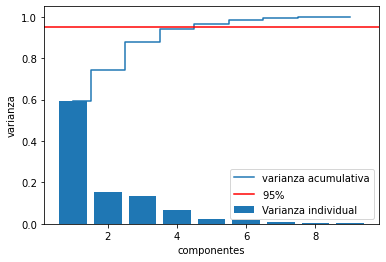

In [88]:
tot = sum(eigen_vals)
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,10),var_exp,label='Varianza individual', align='center')
plt.step(range(1,10),cum_var_exp, where='mid',label='varianza acumulativa')
plt.axhline(y=0.95, color='r', linestyle='solid', label=r'$95\%$') 
plt.xlabel('componentes')
plt.ylabel('varianza')
plt.legend(loc='best')
plt.show()

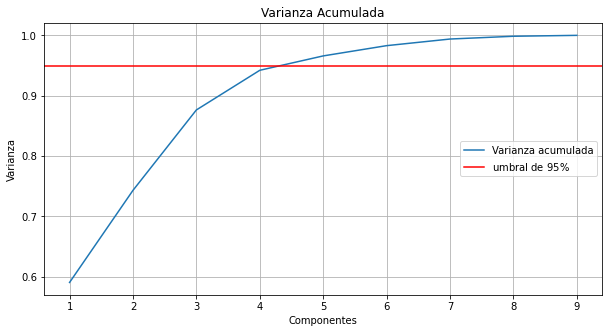

In [18]:
exp_var_cumul = np.cumsum(pcaEx.explained_variance_ratio_)

plt.figure(figsize=(10,5))
plt.plot(range(1, exp_var_cumul.shape[0] + 1),exp_var_cumul, label='Varianza acumulada')
plt.xlabel("Componentes")
plt.ylabel("Varianza")
plt.axhline(y=0.95, color='r', linestyle='solid', label=r'umbral de $95\%$') 
plt.grid(True)
plt.title("Varianza Acumulada")
plt.legend(loc=7)
plt.show()

In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_std)
X_pca = pca.fit_transform(X_std)

In [90]:
np.cumsum(pca.explained_variance_ratio_)

array([0.59067186, 0.74323341, 0.8764472 , 0.94212591, 0.96594691])

In [92]:
pca.components_.shape

(5, 9)

In [69]:
centers, labels = k_means(X_pca, 3)
print(centers)
print(labels)

[[-1.58321908 -0.01861946 -0.01076844 -0.0803269  -0.04648723]
 [ 2.85859981 -3.49446886  4.15173328  1.94130021 -0.42086545]
 [ 2.01379717  0.10573183 -0.08240271  0.06039929  0.07086963]]
[2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 0 2 2 2 0 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 0
 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 2 0 2 0 2 2 0 0 0 2 0 0 0 0 0 2 0 0
 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 2 0 2 2 0 0 0 2 0 0 0 2 0 0 0
 2 2 0 0 2 0 2 0 0 0 0 0 2 2 0 2 2 2 2 2 0 2 2 2 0 0 2 2 0 0 0 2 0 2 0 0 2
 0 0 0 2 0 0 2 0 0 2 0 0 0 2 2 2 1 0 2 0 0 0 2 2 2 0 0 0 0 0 2 2 0 2 2 0 0
 1 2 0 0 0 0 0 0 2 0 0 0 2 2 2 0]


In [70]:
# Preprocesamiento 
y = data['Dx postnatal'].map({'Normal':2, 'Restriction':0, 'Small':1}).values
print(y)

[2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 2 2 0 1 2 2 0 0 1 2 1 2 2 2 2 2 2 2 0 0
 0 2 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 1 2 0 0 0 1 2 0 0 0 0 0 0 0 0 0 2 0 0
 0 1 0 2 0 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 2 0 2 2 0 0 0 2 0 0 1 0 0 0 2
 0 0 0 0 2 0 0 0 2 0 0 0 2 2 0 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2 0 2 0 1 0 0 2
 0 0 2 2 0 0 1 1 2 2 0 2 0 2 0 2 0 1 2 0 0 0 2 2 2 0 1 1 2 0 2 0 0 0 0 1 0
 0 2 0 1 2 1 1 1 2 2 1 0 1 2 2 0]


In [71]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['Dx postnatal'])

le.classes_

# le.transform(data['Dx postnatal'])

# le.inverse_transform(data['Dx postnatal'])


array(['Normal', 'Restriction', 'Small'], dtype=object)

In [72]:
le.transform(data['Dx postnatal'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       0, 0, 1])

In [73]:
data.groupby(['Dx postnatal']).count() 

,birth length,length perc,z score length,birth weight,percentile bw,z score bw,Cephalic Perimeter,CP percentile,z score CP
Dx postnatal,,,,,,,,,
Normal,77,77,77,77,77,77,77,77,77
Restriction,103,103,103,103,103,103,103,103,103
Small,21,21,21,21,21,21,21,21,21


In [74]:
# Datos grupoby de una columna en especial 
#data.groupby('Dx postnatal')['birth length'].nunique()

In [75]:
from sklearn.metrics import confusion_matrix

#confusion_matrix(y_true, y_pred)
confusion_matrix(y, labels)

array([[84,  2, 17],
       [15,  0,  6],
       [14,  0, 63]], dtype=int64)

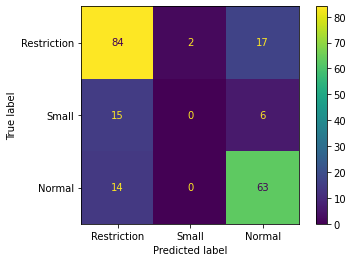

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
labNames = ['Restriction', 'Small','Normal']
# {'Normal':2, 'Restriction':0, 'Small':1}
ConfusionMatrixDisplay.from_predictions(y, labels,display_labels=labNames)
plt.show()


In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_hat = labels
print('Accuracy:',accuracy_score(y, y_hat))
#print('Precision:',precision_score(y, y_hat))
#print('Recall:',recall_score(y, y_hat))
#print('f1_score:',f1_score(y, y_hat))

Accuracy: 0.7313432835820896


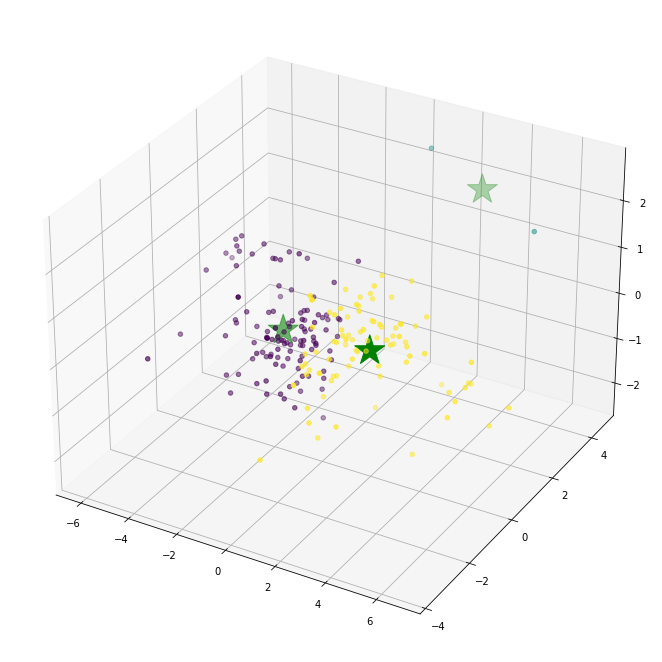

In [50]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16 , 9))
ax = Axes3D( fig )
ax.scatter(X_pca[: , 0] , X_pca[: , 2] , X_pca[: , 3] , c =labels)
ax.scatter(centers[: , 0] , centers[: , 2] , centers[: , 3] , marker = '*' , c = 'green' , s =1000)

# Sin PCA

In [58]:
X = data.iloc[:,1:].values

In [59]:
centers, labels = k_means(X, 3)
print(centers)
print(labels)

[[ 3.57882353e+01  1.03032353e+01 -2.09441176e+00  1.02876471e+03
   9.30235294e+00 -1.98045882e+00  2.59941176e+01  1.54250000e+01
  -1.59940882e+00]
 [ 4.37787234e+01  1.63289362e+01 -1.39340319e+00  1.88875532e+03
   8.52308511e+00 -1.78917340e+00  3.11553191e+01  2.65668085e+01
  -8.64018085e-01]
 [ 4.72739726e+01  3.85149315e+01 -3.94898630e-01  2.60504110e+03
   2.30672603e+01 -9.11390411e-01  3.32356164e+01  4.93772397e+01
   3.90006849e-02]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 0 1 1 2 2 2 2 2 2 2 2 1 1 0
 1 1 0 0 1 0 1 0 1 0 1 0 0 1 2 0 0 1 2 2 1 1 2 2 2 1 1 0 1 1 1 0 1 1 2 2 1
 1 2 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 2 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1
 1 2 1 1 2 1 2 1 1 1 1 0 2 1 1 1 1 2 2 2 0 2 2 2 0 0 1 1 1 1 0 1 1 2 1 0 2
 1 1 1 2 1 1 1 0 1 1 1 1 1 1 2 2 2 0 2 2 1 2 2 1 1 2 0 2 1 1 2 2 1 2 2 1 1
 0 2 1 1 0 2 2 1 2 2 1 2 2 2 1 1]


In [60]:
y = data['Dx postnatal'].map({'Normal':2, 'Restriction':1, 'Small':0}).values
print(y)

[2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 2 2 1 0 2 2 1 1 0 2 0 2 2 2 2 2 2 2 1 1
 1 2 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 0 2 1 1 1 0 2 1 1 1 1 1 1 1 1 1 2 1 1
 1 0 1 2 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 2 1 2 2 1 1 1 2 1 1 0 1 1 1 2
 1 1 1 1 2 1 1 1 2 1 1 1 2 2 1 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2 1 2 1 0 1 1 2
 1 1 2 2 1 1 0 0 2 2 1 2 1 2 1 2 1 0 2 1 1 1 2 2 2 1 0 0 2 1 2 1 1 1 1 0 1
 1 2 1 0 2 0 0 0 2 2 0 1 0 2 2 1]


In [61]:
from sklearn.metrics import confusion_matrix

#confusion_matrix(y_true, y_pred)
confusion_matrix(y, labels)

array([[ 4,  7, 10],
       [24, 63, 16],
       [ 6, 24, 47]], dtype=int64)

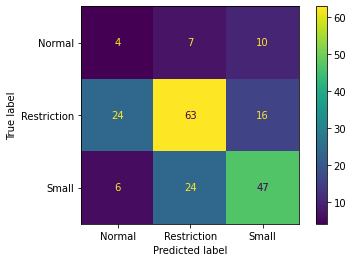

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay
lab_names = ['Normal', 'Restriction', 'Small']
# {'Normal':2, 'Restriction':1, 'Small':0}
#laNmes = {2:'Normal', 1:'Restriction', 0:'Small'}
ConfusionMatrixDisplay.from_predictions(y, labels, display_labels=lab_names)
plt.show()

In [53]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
y_hat = labels
print('Accuracy:',accuracy_score(y, y_hat))

Accuracy: 0.5671641791044776


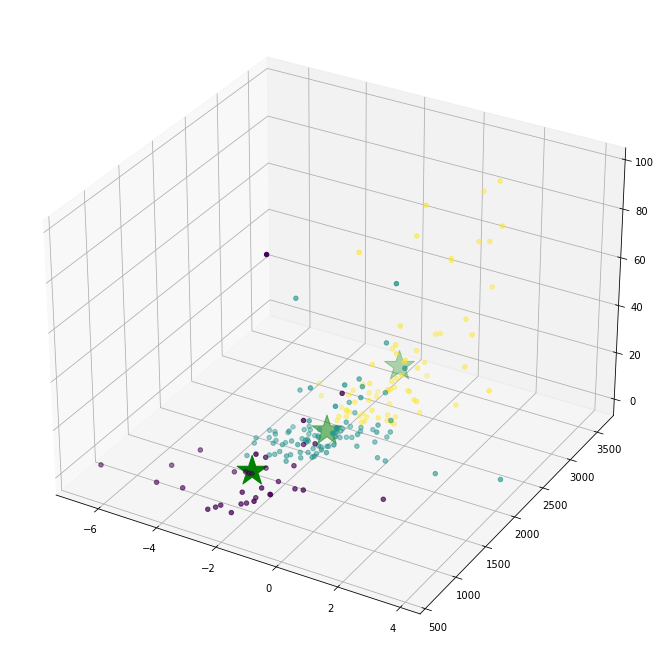

In [57]:
fig = plt.figure(figsize=(16 , 9))
ax = Axes3D( fig )
ax.scatter(X[: , 2] , X[: , 3] , X[: , 4] , c =labels)
ax.scatter(centers[: , 2] , centers[: , 3] , centers[: , 4] , marker = '*' , c = 'green' , s =1000)